In [1]:
import Graph
from Prims import run_prims
import Tree
import matplotlib.pyplot as plt
import time

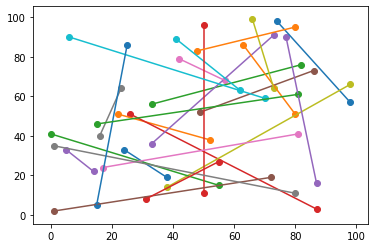

In [2]:
g = Graph.WeightedGraph.create_test_graph(100,100,50)
x_lst = []
y_lst = []
temp = 0
for vertex in g._vertices:
    x_lst.append(vertex.x)
    y_lst.append(vertex.y)
    temp += 1
    if(temp == 2):
        plt.scatter(x_lst, y_lst)
        plt.plot(x_lst, y_lst)
        temp = 0
        x_lst.clear()
        y_lst.clear()
 
plt.show()       

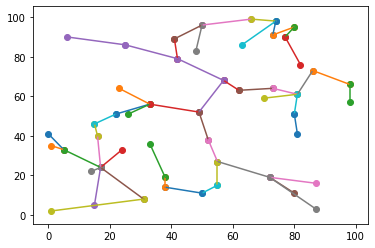

In [3]:
t = run_prims(g, g.get_starting_vertex())
nodes = t.get_connections()
x_lst = []
y_lst = []
for node in nodes:
    x_lst.append(node[0].x)
    x_lst.append(node[1].x)
    y_lst.append(node[0].y)
    y_lst.append(node[1].y)
    plt.scatter(x_lst, y_lst)
    plt.plot(x_lst, y_lst)
    x_lst.clear()
    y_lst.clear()
plt.show()